
# 💼 Data Science Job Salaries — Cleaning & EDA 

**Author:** Vaibhav Parmar  
**Goal:** Clean the Data Science Job Salaries dataset and explore it with simple, clear visualizations.





## 🚀 How to Use
1. Keep the CSV in the same folder (already uploaded).  
2. Run all cells in order.  
3. Outputs (cleaned CSV + charts) are saved to `outputs_salaries/`.


In [9]:
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

CSV_PATH = r"Data Science Job Salaries.csv"   
FIG_DIR = r"outputs_salaries/figures"
DATA_DIR = r"outputs_salaries/data"

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

df = pd.read_csv(CSV_PATH)   
print("First 5 rows:")
display(df.head())
print("\nInfo:")
print(df.info())


First 5 rows:


,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None



## 🧼 Basic Cleaning
- Standardize column names  
- Remove duplicates  
- Fill important text fields with 'Unknown'  
- Convert numeric columns safely


In [10]:

df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

before = len(df)
df = df.drop_duplicates()
print("Removed duplicates:", before - len(df))

for col in ["job_title", "employee_residence", "company_location", "company_size", "experience_level", "employment_type"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().replace({np.nan: "Unknown", "": "Unknown"})

for col in ["salary", "salary_in_usd", "remote_ratio", "work_year"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

cleaned_path = os.path.join(DATA_DIR, "ds_salaries_cleaned.csv")
df.to_csv(cleaned_path, index=False)
print("[Saved cleaned data]", cleaned_path)
display(df.head())


Removed duplicates: 0
[Saved cleaned data] outputs_salaries/data\ds_salaries_cleaned.csv


,unnamed:_0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L



## 📊 Quick Summary


In [11]:

print("Total rows after cleaning:", len(df))

if "work_year" in df.columns:
    years = sorted(df["work_year"].dropna().unique().tolist())
    print("Years covered:", years[:5], "...", years[-5:] if len(years) > 5 else years)

if "job_title" in df.columns:
    display(df["job_title"].value_counts().head(10))

if "company_location" in df.columns:
    display(df["company_location"].value_counts().head(10))

if "experience_level" in df.columns and "salary_in_usd" in df.columns:
    display(df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False).round(2))


Total rows after cleaning: 607
Years covered: [2020, 2021, 2022] ... [2020, 2021, 2022]


job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Machine Learning Scientist      8
Big Data Engineer               8
Director of Data Science        7
Name: count, dtype: int64

company_location
US    355
GB     47
CA     30
DE     28
IN     24
FR     15
ES     14
GR     11
JP      6
NL      4
Name: count, dtype: int64

experience_level
EX    199392.04
SE    138617.29
MI     87996.06
EN     61643.32
Name: salary_in_usd, dtype: float64


## 📈 Visuals 


In [12]:

def savefig(path):
    plt.tight_layout()
    plt.savefig(path, dpi=150, bbox_inches="tight")
    print("[Saved figure]", path)


[Saved figure] outputs_salaries/figures\top10_job_titles.png


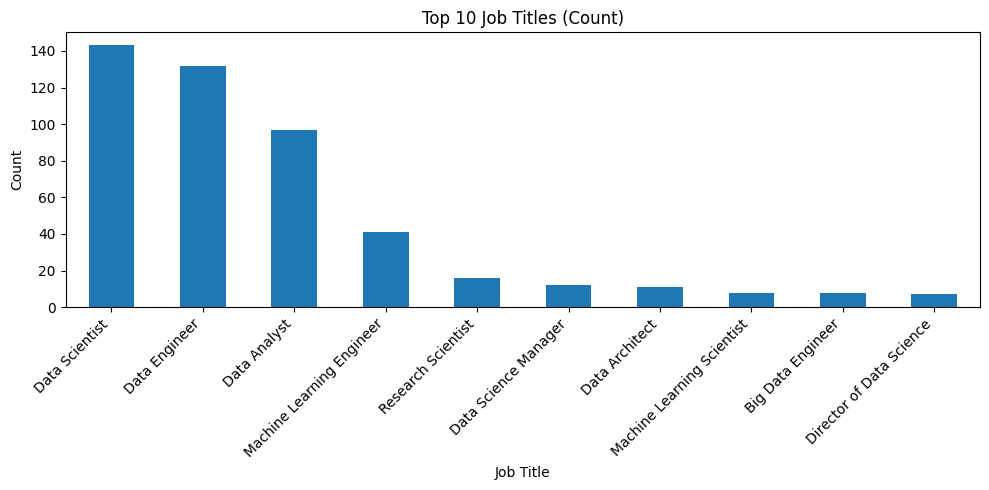

In [13]:

# Top 10 Job Titles
if "job_title" in df.columns:
    top_jobs = df["job_title"].value_counts().head(10)
    top_jobs.plot(kind="bar", figsize=(10,5))
    plt.title("Top 10 Job Titles (Count)")
    plt.xlabel("Job Title"); plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    savefig(os.path.join(FIG_DIR, "top10_job_titles.png"))
    plt.show()


[Saved figure] outputs_salaries/figures\avg_salary_by_experience.png


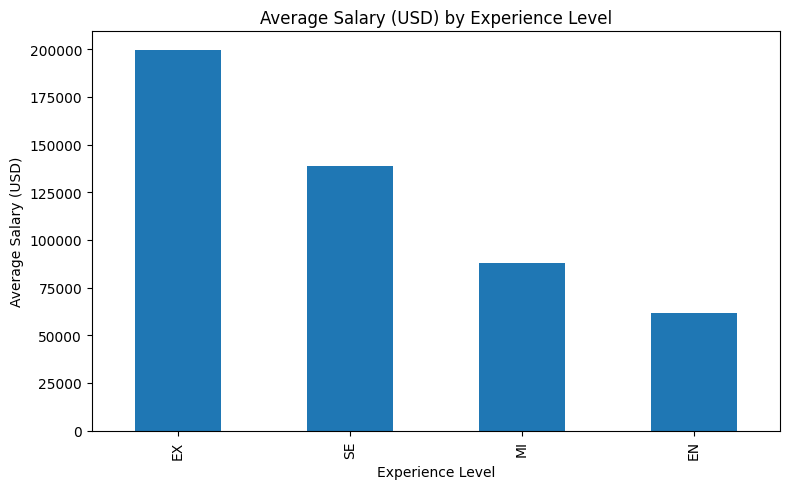

In [14]:

# Average salary by experience level
if "experience_level" in df.columns and "salary_in_usd" in df.columns:
    avg_salary_by_exp = df.groupby("experience_level")["salary_in_usd"].mean().sort_values(ascending=False).round(2)
    avg_salary_by_exp.plot(kind="bar", figsize=(8,5))
    plt.title("Average Salary (USD) by Experience Level")
    plt.xlabel("Experience Level"); plt.ylabel("Average Salary (USD)")
    savefig(os.path.join(FIG_DIR, "avg_salary_by_experience.png"))
    plt.show()


[Saved figure] outputs_salaries/figures\median_salary_by_year.png


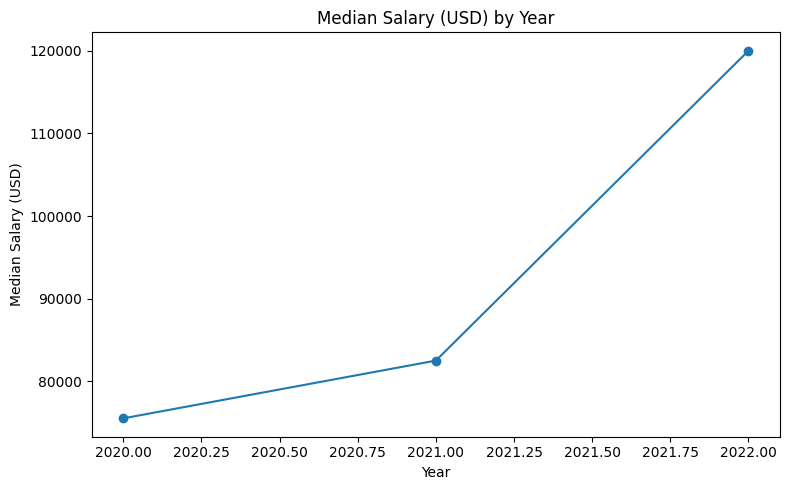

In [15]:

# Median salary by year
if "work_year" in df.columns and "salary_in_usd" in df.columns:
    salary_trend = df.groupby("work_year")["salary_in_usd"].median().sort_index().round(2)
    plt.figure(figsize=(8,5)); plt.plot(salary_trend.index, salary_trend.values, marker="o")
    plt.title("Median Salary (USD) by Year")
    plt.xlabel("Year"); plt.ylabel("Median Salary (USD)")
    savefig(os.path.join(FIG_DIR, "median_salary_by_year.png"))
    plt.show()


[Saved figure] outputs_salaries/figures\top10_company_locations.png


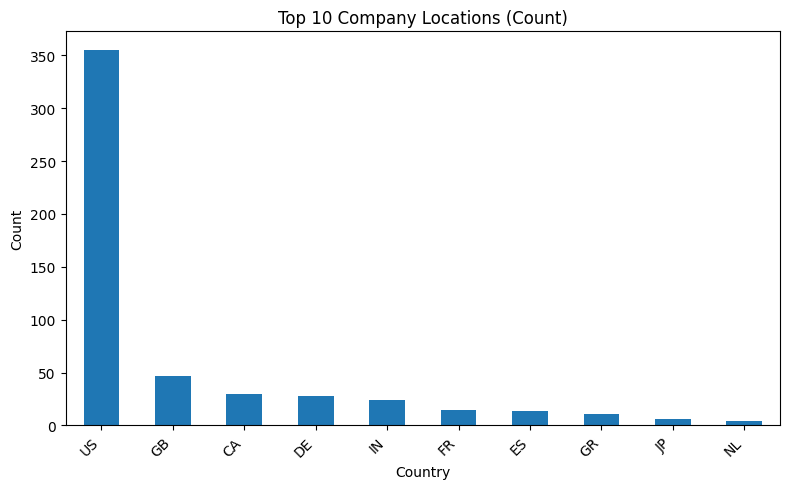

In [16]:

# Top company locations
if "company_location" in df.columns:
    country_counts = df["company_location"].value_counts().head(10)
    country_counts.plot(kind="bar", figsize=(8,5))
    plt.title("Top 10 Company Locations (Count)")
    plt.xlabel("Country"); plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    savefig(os.path.join(FIG_DIR, "top10_company_locations.png"))
    plt.show()


[Saved figure] outputs_salaries/figures\remote_ratio_distribution.png


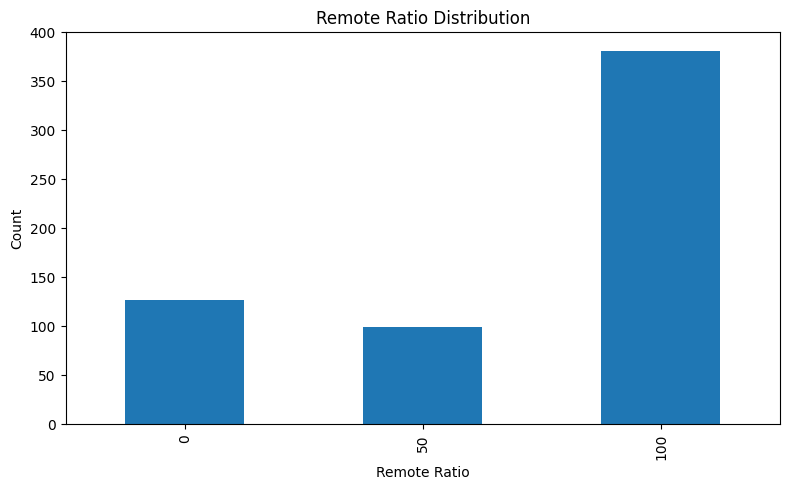

In [17]:

# Remote ratio distribution
if "remote_ratio" in df.columns:
    remote_dist = df["remote_ratio"].value_counts().sort_index()
    remote_dist.plot(kind="bar", figsize=(8,5))
    plt.title("Remote Ratio Distribution")
    plt.xlabel("Remote Ratio"); plt.ylabel("Count")
    savefig(os.path.join(FIG_DIR, "remote_ratio_distribution.png"))
    plt.show()




# 📝 Insights:-

Most frequent roles include: Data Scientist, Data Engineer, Data Analyst, Machine Learning
Engineer, Research Scientist (top among 10 shown).

Average salary by experience (USD) shows higher pay for senior roles — EX: $199,392, SE:
$138,617, MI: $87,996, EN: $61,643.

Common company locations: US, GB, CA, DE, IN.

Remote work mix based on 'remote_ratio': 0% remote: 127, 50% remote: 99, 100% remote: 381.

Median salaries by year indicate a trend across 2020–2022
